In [ ]:
#先引入后面可能用到的包（package）
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#正常显示画图时出现的中文
from pylab import mpl
#这里使用微软雅黑字体
plt.rcParams['font.sans-serif']=['SimHei']
#画图时显示负号
plt.rcParams['axes.unicode_minus']=False
import seaborn as sns  #画图用的
import tushare as ts
from cvxopt import matrix, solvers

#Jupyter Notebook特有的magic命令
#直接在行内显示图形
#设置token
token='ae7603bac9c9fd3f78f08f0e5f92ec9222c62f488e9e5a28c5002109'
#ts.set_token(token)
pro = ts.pro_api(token)
%matplotlib inline

In [ ]:
def get_index_data(stock_dict,start_date,end_date):
    # 初始化一个空的DataFrame，用于存储所有股票的收盘价数据
    df_close = pd.DataFrame()

    # 遍历股票字典，获取每个股票的收盘价数据，并将其添加到df_close DataFrame中
    for stock_name, stock_code in stock_dict.items():
        # 获取股票日线数据
        data = pro.daily(ts_code=stock_code, start_date=start_date, end_date=end_date)
        # 将交易日期设为索引
        data.index = pd.to_datetime(data['trade_date'])

        # 仅保留收盘价数据，并将列名设置为股票名称
        df_close[stock_name] = data['close']

    # 确保所有时间序列的索引都是按日期排序的

    df_close.sort_index(inplace=True)
    return df_close


# 股票代码列表
stock_dict = {
    '平安银行': '000001.SZ',
    '贵州茅台': '600519.SH',
    '万科A': '000002.SZ',
    '工商银行': '601398.SH',
    '中国石油': '601857.SH'
}# 设置开始和结束日期
start_date = '20150101'
end_date = '20230331'


# 现在df_close是一个以时间为索引，以不同股票代码为列的收盘价数据DataFrame
df_close = get_index_data(stock_dict,start_date,end_date)
df_return = df_close.pct_change().dropna()
df_return

findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not foun

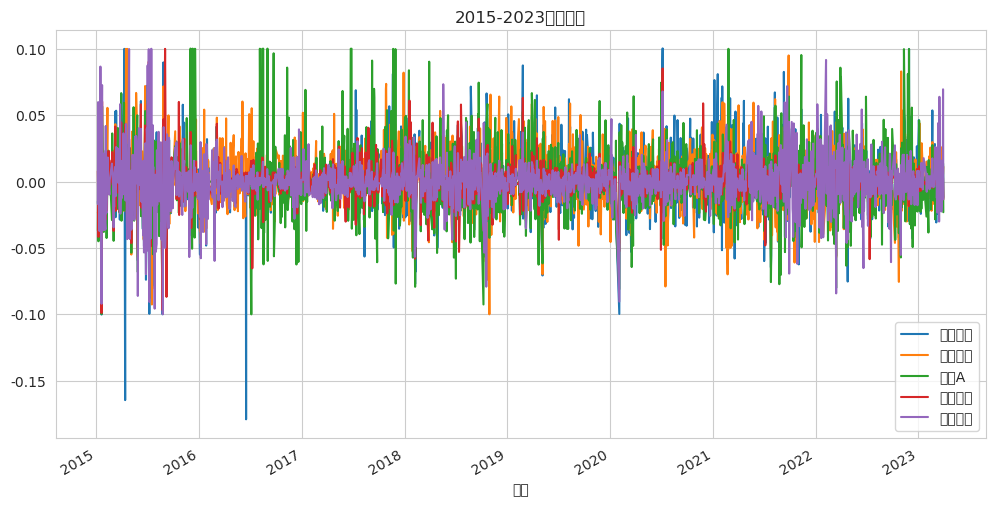

In [149]:
df_return.plot(figsize=(12,6))
plt.title('2015-2023年走势图')
plt.xlabel('日期')
plt.show()

In [150]:
df_return.describe()

,平安银行,贵州茅台,万科A,工商银行,中国石油
count,2005.000000,2005.000000,2005.000000,2005.000000,2005.000000
mean,0.000116,0.001301,0.000308,0.000026,-0.000199
std,0.021779,0.020302,0.024478,0.013306,0.017226
min,-0.179119,-0.100000,-0.100045,-0.099029,-0.099895
25%,-0.010745,-0.009491,-0.011972,-0.005639,-0.007194
50%,-0.000581,0.000148,0.000000,0.000000,0.000000
75%,0.009790,0.012081,0.009619,0.005300,0.006502
max,0.100351,0.100000,0.100199,0.100000,0.100081


findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
/opt/miniconda3/envs/Morgan Stanley/lib/python3.10/site-packages/seaborn/axisgrid.py:123: UserWarning: Glyph 24179 (\N{CJK UNIFIED IDEOGRAPH-5E73}) miss

findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
/opt/miniconda3/envs/Morgan Stanley/lib/python3.10/site-packages/IPython/core/events.py:82: UserWarning: Glyph 24179 (\N{CJK UNIFIED IDEOGRAPH-5E73}) missing from current font.
  func(*args, **kwargs)
/opt/miniconda3/envs/Morgan Stanley/lib/python3.10/site-p

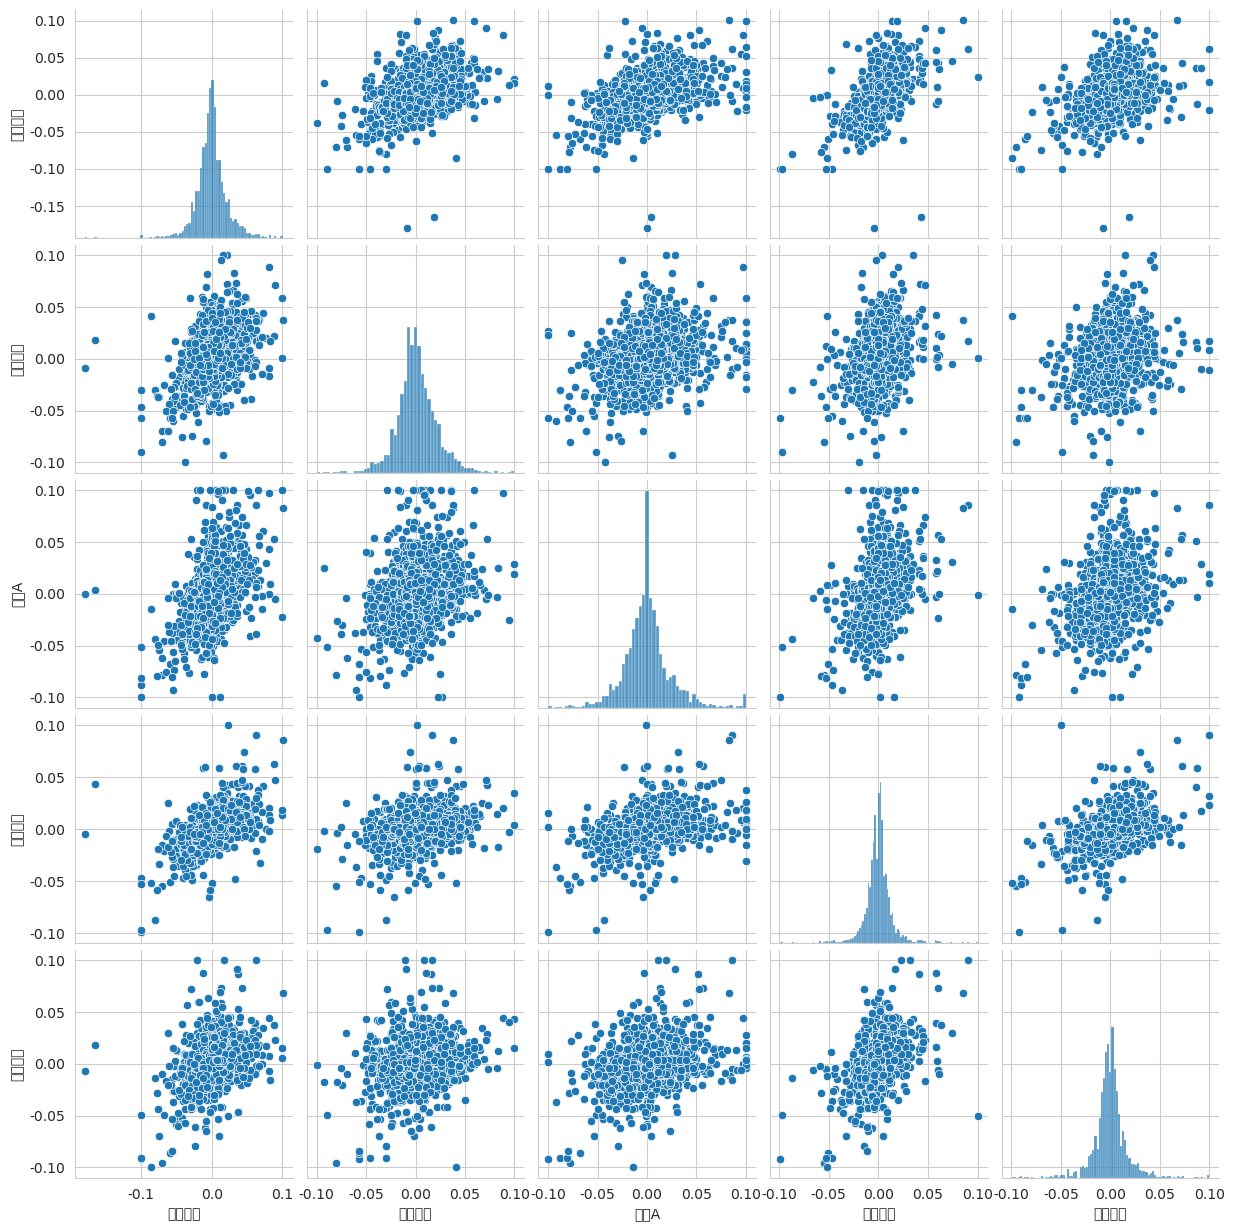

In [151]:
sns.pairplot(data = df_return)

In [152]:
ret =df_return
# Create portfolio with random weights, and compute stats:

np.random.seed(22) # set seed for reproducibility

rf_ret = 0.04 # risk-free return
n_ptf = 10000
weights = np.zeros((n_ptf, 5))
ptf_rets = np.zeros(n_ptf) # ptf returns
ptf_volas = np.zeros(n_ptf) # ptf volatilities
ptf_SRs = np.zeros(n_ptf) # ptf Sharpe Ratios

for idx in range(n_ptf):

    # Weights for each portfolio:
    w = np.array(np.random.random(5))
    w = w / np.sum(w) # to normalize weights

    # Fill weights matrix:
    weights[idx, :] = w

    # Expected return for each portfolio:
    ptf_rets[idx] = np.sum((ret.mean() * w * 252)) # 252 to annualize: 252 t-days in a year

    # Volatility for each portfolio
    ptf_volas[idx] = np.sqrt(np.dot(w.T, np.dot(ret.cov() * 252, w))) # 252 to annualize: 252 t-days in a year

    # Sharpe Ratio for each portfolio:
    ptf_SRs[idx] = (ptf_rets[idx] - rf_ret) / ptf_volas[idx]

findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not foun

The portofolio with the highest SR is pft # 7127
its expected return is: 0.24785162325982837
its volatility is: 0.2748439134517457
its SR is: 0.7562533244758242
and its weights for 平安银行, 贵州茅台, 万科A, 工商银行, 中国石油 are, respectively: [ 0.16728371 69.5500245  26.16239377  2.72164775  1.39865027] %


findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not foun

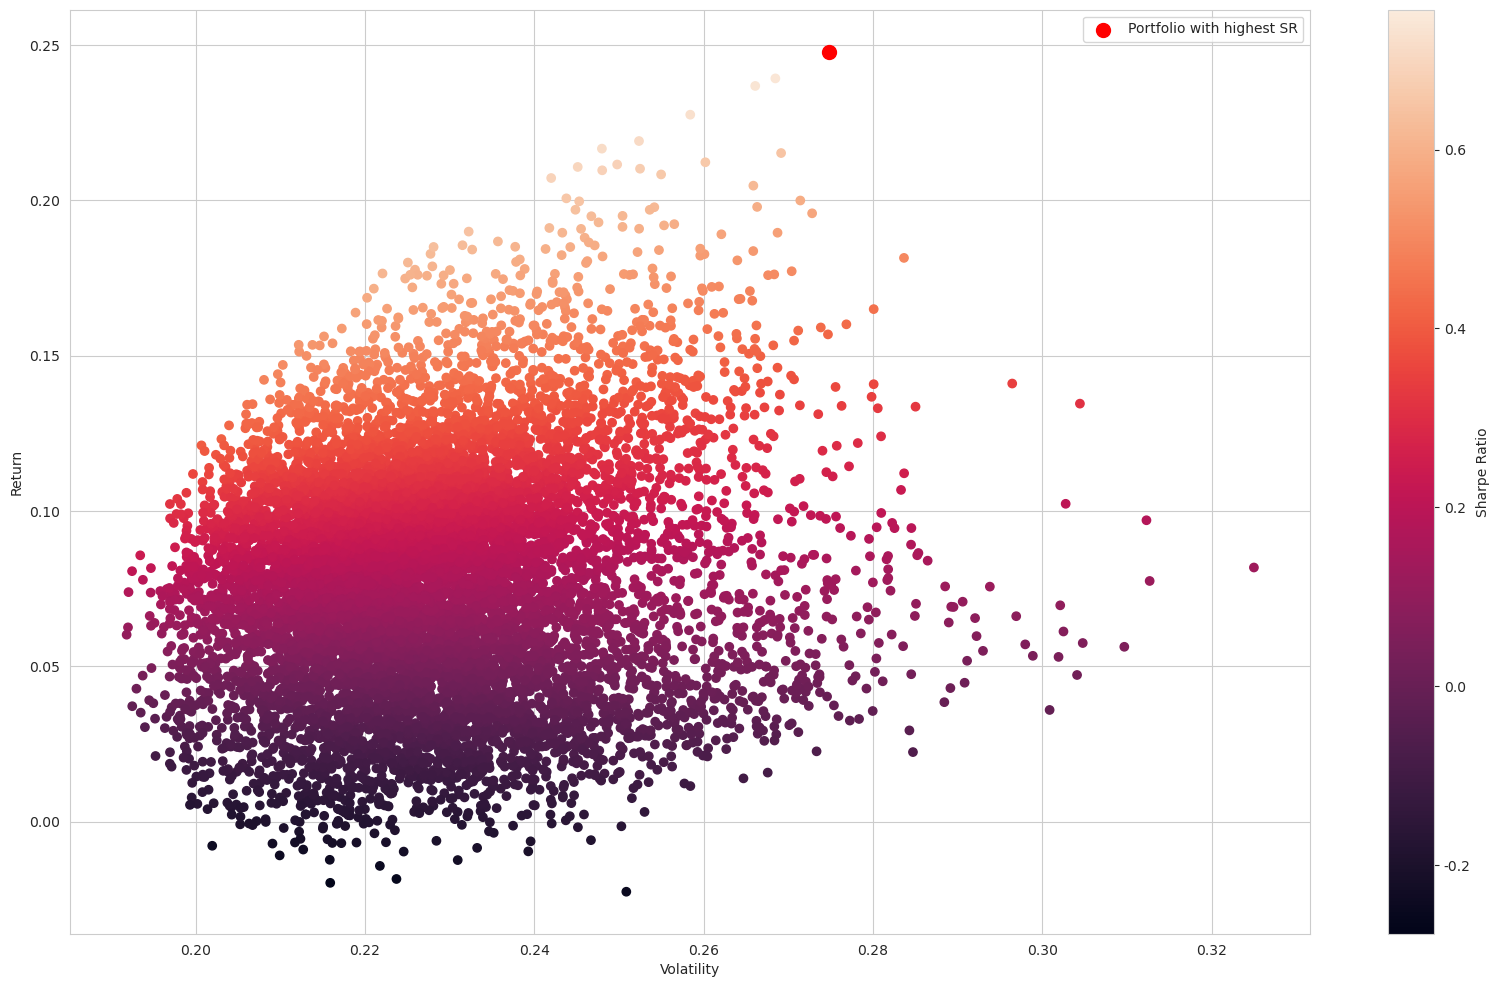

In [153]:
# Portofolio with highest Sharpe Ratio:

print("The portofolio with the highest SR is pft #", ptf_SRs.argmax())
print("its expected return is:", ptf_rets[ptf_SRs.argmax()])
print("its volatility is:", ptf_volas[ptf_SRs.argmax()])
print("its SR is:", ptf_SRs.max())
print("and its weights for 平安银行, 贵州茅台, 万科A, 工商银行, 中国石油 are, respectively:", 100 * weights[ptf_SRs.argmax(), :], "%")
plt.figure(figsize = (20,12))
plt.scatter(ptf_volas, ptf_rets,c = ptf_SRs)
plt.colorbar(label = 'Sharpe Ratio')
plt.xlabel('Volatility')
plt.ylabel('Return')
plt.scatter(ptf_volas[ptf_SRs.argmax()], ptf_rets[ptf_SRs.argmax()],c = "red",s = 100,label = "Portfolio with highest SR")
plt.legend()
plt.show()


In [189]:
#2.对选取的五支股票进行收益率数据分析，进行给定预期收益的最佳持仓配比求解
from scipy import optimize

# Find optimal portfolio with lowest variance return:
# 修改权重和为1的约束函数，使其不接受外部参数
def weights_const(w):
    return np.sum(w) - 1

# 返回满足特定收益率R的约束函数
def return_constraint(R):
    def constraint(w):
        return np.sum(ret.mean() * w) * 252 - R
    return constraint

# 方差最小化函数不变
def get_vola(w):
    w = np.array(w)
    vola_w = np.sqrt(np.dot(w.T, np.dot(ret.cov() * 252, w)))
    return vola_w

def get_ret(w):
    w = np.array(w)
    ret_w = np.sum(ret.mean() * w) * 252
    return ret_w

def optimize_portfolio(R, bounds, x0):
    constraints = (
        {'type': 'eq', 'fun': weights_const},
        {'type': 'eq', 'fun': return_constraint(R)}  # 使用R作为参数
    )
    optim_ptf = optimize.minimize(get_vola, x0, method='SLSQP', bounds=bounds, constraints=constraints)
    return optim_ptf



const = ({'type': 'eq', 'fun': weights_const}) # optimization constraints
bounds = ((0, 1), (0, 1), (0, 1), (0, 1), (0, 1)) # weights bounds
x0 = [0.25, 0.25, 0.25, 0.25,0.25] # starting point for optimization
R = 0.17
optim_ptf = optimize_portfolio(R, bounds,x0)
opt_ret = np.sum(ret.mean() * optim_ptf.x) * 252
opt_vola = np.sqrt(np.dot(optim_ptf.x.T, np.dot(ret.cov() * 252, optim_ptf.x)))
opt_sr = opt_ret / opt_vola

print("Optimal weights:", np.round(optim_ptf.x*100,2), "%")
print("Optimal return:", opt_ret)
print("Optimal volatility:", opt_vola)
print("Optimal Sharpe ratio:", opt_sr)


Optimal weights: [ 0.   50.69  3.99 41.39  3.93] %
Optimal return: 0.1699999999988906
Optimal volatility: 0.2185905904260056
Optimal Sharpe ratio: 0.777709597048903


In [160]:
# Investment set + efficient frontier plot:

findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not foun

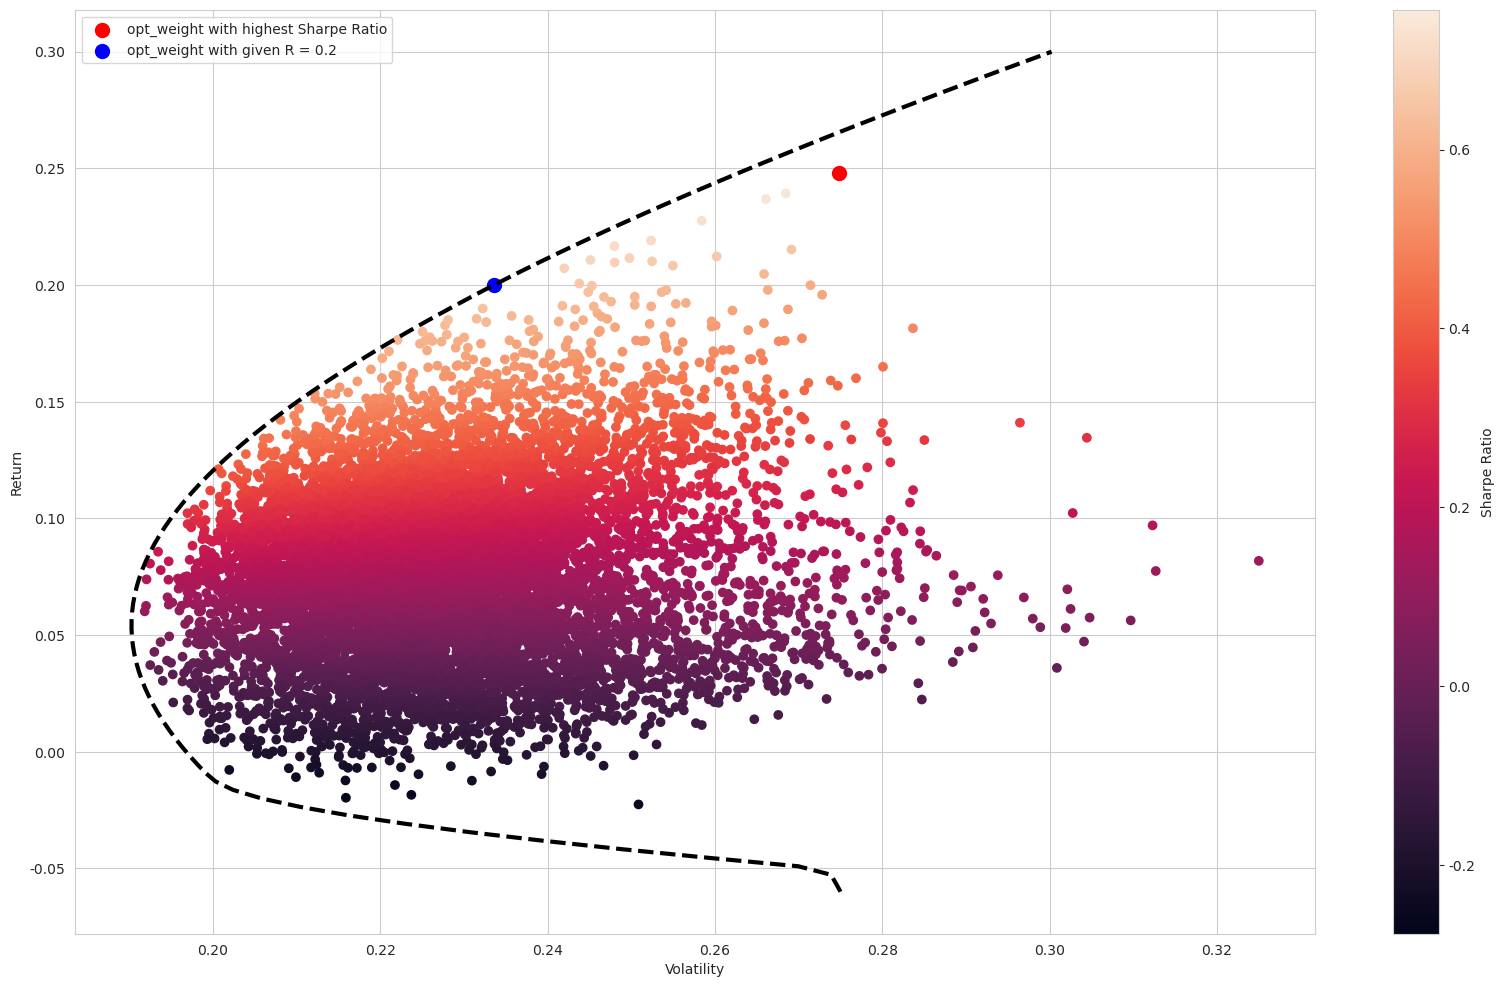

In [161]:
#绘制efficient frontier
# Estimated min and max ret by looking at the chart above:

def efficient_front(min_ret,max_ret):
    # Define efficient frontier: we will minimize volatility for every level of return (you could also do the opposite)
    eff_front_yaxis = np.linspace(min_ret, max_ret, 100)
    eff_front_xaxis = []

    # Loop across all possible return between min and max ret:
    for rets in eff_front_yaxis:
        const = ({'type': 'eq', 'fun': weights_const},
                {'type': 'eq', 'fun': lambda w: get_ret(w) - rets})

        opt_vola = optimize.minimize(get_vola, x0, method = 'SLSQP', bounds = bounds, constraints = const)
        eff_front_xaxis.append(opt_vola['fun'])
    return eff_front_xaxis, eff_front_yaxis

min_ret = -0.06
max_ret = 0.3
eff_front_xaxis,eff_front_yaxis = efficient_front(min_ret,max_ret)

plt.figure(figsize = (20, 12))
plt.scatter(ptf_volas, ptf_rets, c = ptf_SRs) # investment set
plt.colorbar(label = 'Sharpe Ratio')
plt.xlabel('Volatility')
plt.ylabel('Return')
plt.plot(eff_front_xaxis, eff_front_yaxis, 'k--', linewidth = 3) # efficient frontier
plt.scatter(ptf_volas[ptf_SRs.argmax()], ptf_rets[ptf_SRs.argmax()], c = 'red', s =100, label = "opt_weight with highest Sharpe Ratio") # to highlight the ptf with highest SR
plt.scatter(opt_vola, opt_ret, c = 'blue', s = 100,label = "opt_weight with given R = {}".format(R))
plt.legend()
plt.show()

In [175]:
#步骤3
returns = ret

# 计算股票收益率的平均值和协方差矩阵
mean_returns = np.mean(returns, axis=0)
cov_matrix = np.cov(returns, rowvar=False)

# 配置最优化问题的参数
num_assets = len(mean_returns)
risk_aversion = 10  # 风险厌恶系数

P = matrix(risk_aversion * cov_matrix)  # 二次项
q = matrix(-mean_returns)  # 线性项
G = matrix(-np.eye(num_assets))  # 不等式约束
h = matrix(np.zeros(num_assets))
A = matrix(1.0, (1, num_assets))  # 等式约束
b = matrix(1.0)

# 解最优化问题
solvers.options['show_progress'] = False
solution = solvers.qp(P, q, G, h, A, b)

# 打印结果
print("Optimal portfolio allocation:\n")
allocations = np.array(solution['x'])
for i, alloc in enumerate(allocations):
    print("Stock {} : {}%".format(i,np.round(alloc[0]*100,2)))

print("Optimal portfolio allocation:",np.round(solution['x']*100,2))

Optimal portfolio allocation:

Stock 0 : 0.0%
Stock 1 : 50.7%
Stock 2 : 4.05%
Stock 3 : 41.24%
Stock 4 : 4.01%
Optimal portfolio allocation: [[ 0.  ]
 [50.7 ]
 [ 4.05]
 [41.24]
 [ 4.01]]


In [187]:
w = np.array(solution['x']).reshape((len(solution['x']),))
opt_ret = np.sum(ret.mean() * w) * 252
opt_vola = np.sqrt(np.dot(w.T, np.dot(ret.cov() * 252, w)))
opt_sr = opt_ret / opt_vola

print("Optimal weights:", np.round(w*100,2), "%")
print("Optimal return:", opt_ret)
print("Optimal volatility:", opt_vola)
print("Optimal Sharpe ratio:", opt_sr)


Optimal weights: [ 0.   50.7   4.05 41.24  4.01] %
Optimal return: 0.17002583046665956
Optimal volatility: 0.21860247912942354
Optimal Sharpe ratio: 0.7777854631099395


In [ ]:

# Optimal weights: [ 0.   50.69  3.99 41.39  3.93] %
# Optimal return: 0.1699999999988906
# Optimal volatility: 0.2185905904260056
# Optimal Sharpe ratio: 0.777709597048903